In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('states_all.csv')
df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


In [3]:
df1 = df.dropna()
df1

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
561,2003_ALABAMA,ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,...,57323.0,59663.0,42005.0,466920.0,205907.0,731220.0,223.0,262.0,207.0,253.0
562,2003_ALASKA,ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,...,10115.0,11140.0,8651.0,82337.0,40238.0,133933.0,233.0,279.0,212.0,256.0
563,2003_ARIZONA,ARIZONA,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,2810907.0,...,76207.0,76376.0,68815.0,613442.0,307272.0,1012068.0,229.0,271.0,209.0,255.0
564,2003_ARKANSAS,ARKANSAS,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,...,34070.0,37004.0,28840.0,281834.0,132712.0,454523.0,229.0,266.0,214.0,258.0
565,2003_CALIFORNIA,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,...,493415.0,500143.0,395194.0,3929869.0,1854518.0,6413867.0,227.0,267.0,206.0,251.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,2015_VIRGINIA,VIRGINIA,2015,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,...,96851.0,95221.0,90391.0,772414.0,386781.0,1283590.0,247.0,288.0,229.0,267.0
1220,2015_WASHINGTON,WASHINGTON,2015,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,...,82404.0,79483.0,89258.0,656797.0,336808.0,1087030.0,245.0,287.0,226.0,267.0
1221,2015_WEST_VIRGINIA,WEST_VIRGINIA,2015,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,...,19814.0,20426.0,18432.0,162070.0,80142.0,277452.0,235.0,271.0,216.0,260.0
1222,2015_WISCONSIN,WISCONSIN,2015,861813.0,11637376.0,814385.0,5869265.0,4953726.0,11553677.0,5723474.0,...,60999.0,61084.0,66253.0,489919.0,263896.0,867800.0,243.0,289.0,223.0,270.0


In [4]:
df1.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [5]:
df1.dtypes

PRIMARY_KEY                      object
STATE                            object
YEAR                              int64
ENROLL                          float64
TOTAL_REVENUE                   float64
FEDERAL_REVENUE                 float64
STATE_REVENUE                   float64
LOCAL_REVENUE                   float64
TOTAL_EXPENDITURE               float64
INSTRUCTION_EXPENDITURE         float64
SUPPORT_SERVICES_EXPENDITURE    float64
OTHER_EXPENDITURE               float64
CAPITAL_OUTLAY_EXPENDITURE      float64
GRADES_PK_G                     float64
GRADES_KG_G                     float64
GRADES_4_G                      float64
GRADES_8_G                      float64
GRADES_12_G                     float64
GRADES_1_8_G                    float64
GRADES_9_12_G                   float64
GRADES_ALL_G                    float64
AVG_MATH_4_SCORE                float64
AVG_MATH_8_SCORE                float64
AVG_READING_4_SCORE             float64
AVG_READING_8_SCORE             float64


In [6]:
df2 = df1[['STATE',
           'TOTAL_REVENUE',
           'ENROLL',
           'INSTRUCTION_EXPENDITURE',
           'SUPPORT_SERVICES_EXPENDITURE',
           'GRADES_ALL_G',
           'AVG_MATH_4_SCORE',
           'AVG_READING_4_SCORE',
           'FEDERAL_REVENUE',
           'STATE_REVENUE',
           'LOCAL_REVENUE'
          ]]
df2.head()

,STATE,TOTAL_REVENUE,ENROLL,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_READING_4_SCORE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE
561,ALABAMA,5196054.0,727900.0,2817111.0,1521462.0,731220.0,223.0,207.0,567704.0,2966981.0,1661369.0
562,ALASKA,1425948.0,133303.0,763525.0,514052.0,133933.0,233.0,212.0,259423.0,813371.0,353154.0
563,ARIZONA,6529894.0,875111.0,2810907.0,1964229.0,1012068.0,229.0,209.0,740579.0,2912629.0,2876686.0
564,ARKANSAS,3241275.0,450158.0,1768713.0,972598.0,454523.0,229.0,214.0,379947.0,2394336.0,466992.0
565,CALIFORNIA,59815855.0,6226552.0,29561563.0,17030335.0,6413867.0,227.0,206.0,5795655.0,33617766.0,20402434.0


## How does Different Percentages of funding Compare to 4th Grade Math Scores

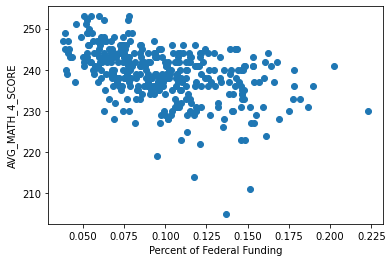

In [7]:
# How does the percentage of federal funding correlate to math grades?
plt.scatter(df2['FEDERAL_REVENUE']/df2['TOTAL_REVENUE'], df2['AVG_MATH_4_SCORE'])
plt.xlabel('Percent of Federal Funding')
plt.ylabel('AVG_MATH_4_SCORE')
plt.show()

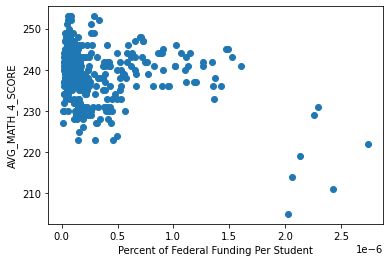

In [8]:
# Federal percent per student:
plt.scatter((df2['FEDERAL_REVENUE']/df2['TOTAL_REVENUE'])/df2['ENROLL'], df2['AVG_MATH_4_SCORE'])
plt.xlabel('Percent of Federal Funding Per Student')
plt.ylabel('AVG_MATH_4_SCORE')
plt.show()

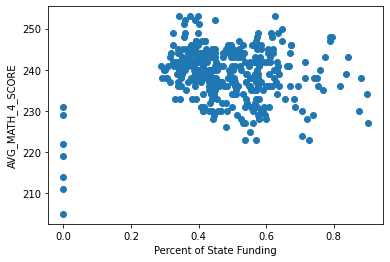

In [9]:
# How does the percentage of state funding correlate to math grades?
plt.scatter(df2['STATE_REVENUE']/df2['TOTAL_REVENUE'], df2['AVG_MATH_4_SCORE'])
plt.xlabel('Percent of State Funding')
plt.ylabel('AVG_MATH_4_SCORE')
plt.show()

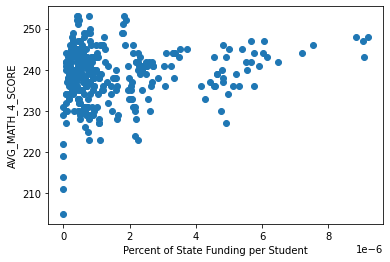

In [10]:
#State Percent Per Student:
plt.scatter((df2['STATE_REVENUE']/df2['TOTAL_REVENUE'])/df2['ENROLL'], df2['AVG_MATH_4_SCORE'])
plt.xlabel('Percent of State Funding per Student')
plt.ylabel('AVG_MATH_4_SCORE')
plt.show()

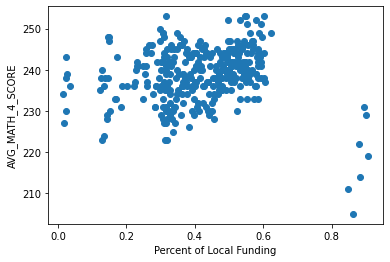

In [11]:
# How does the percentage of local funding correlate to math grades?
plt.scatter(df2['LOCAL_REVENUE']/df2['TOTAL_REVENUE'], df2['AVG_MATH_4_SCORE'])
plt.xlabel('Percent of Local Funding')
plt.ylabel('AVG_MATH_4_SCORE')
plt.show()

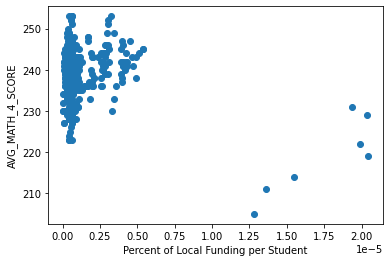

In [12]:
# Local Percent Per Student:
plt.scatter((df2['LOCAL_REVENUE']/df2['TOTAL_REVENUE'])/df2['ENROLL'], df2['AVG_MATH_4_SCORE'])
plt.xlabel('Percent of Local Funding per Student')
plt.ylabel('AVG_MATH_4_SCORE')
plt.show()

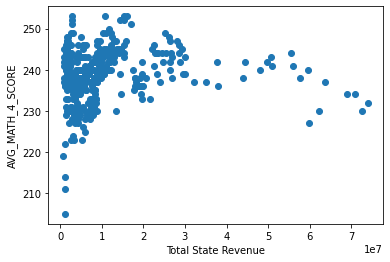

In [13]:
#Looking for relationship between total state revenue and average 4th Grade Math Scores
plt.scatter(df2['TOTAL_REVENUE'], df2['AVG_MATH_4_SCORE'])
plt.xlabel('Total State Revenue')
plt.ylabel('AVG_MATH_4_SCORE')
plt.show()

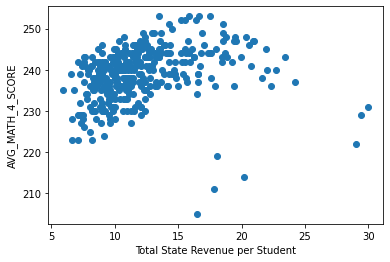

In [14]:
# Total Revenue per student:
plt.scatter(df2['TOTAL_REVENUE']/df2['ENROLL'], df2['AVG_MATH_4_SCORE'])
plt.xlabel('Total State Revenue per Student')
plt.ylabel('AVG_MATH_4_SCORE')
plt.show()

## K-means